<a href="https://colab.research.google.com/github/canalrafael/Pre-Doc/blob/main/descent_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import time
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

torch.Size([100, 1])
torch.Size([100, 1])


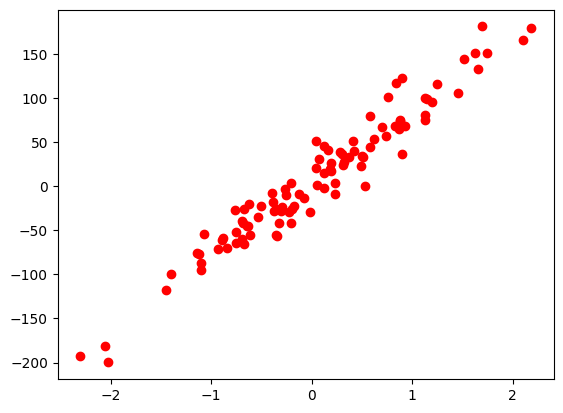

In [2]:
# DATA PREPARATION
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

print(x.shape)
print(y.shape)

plt.plot(x_numpy, y_numpy, 'ro')

In [3]:
# MODEL DEFINITION
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)

In [4]:
# DEFINITION OF COST FUNCTION AND OPTIMIZER
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
print(model.parameters())

<generator object Module.parameters at 0x7939976a5230>


Epoch:  9
Cost: 501.14413452148437500000
Coefficients: 
m: 68.04891204833984375000
m (gradient): -22.94728851318359375000
b: 5.20855665206909179688
b (gradient): 0.54301464557647705078


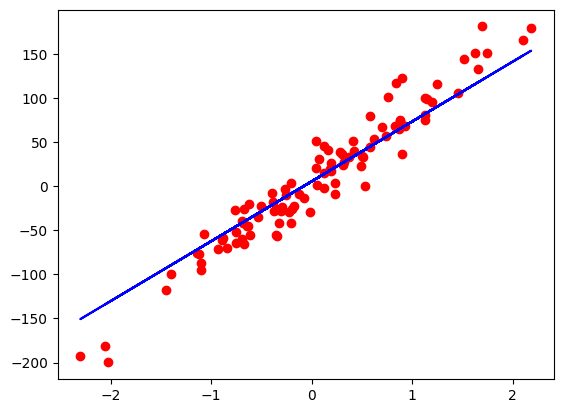

Epoch:  19
Cost: 455.61398315429687500000
Coefficients: 
m: 70.15442657470703125000
m (gradient): -19.58698272705078125000
b: 5.14614486694335937500
b (gradient): 0.68011939525604248047


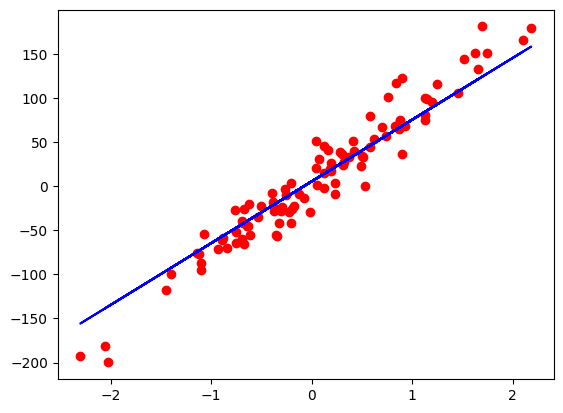

Epoch:  29
Cost: 422.41369628906250000000
Coefficients: 
m: 71.95173645019531250000
m (gradient): -16.72100257873535156250
b: 5.07345485687255859375
b (gradient): 0.75753319263458251953


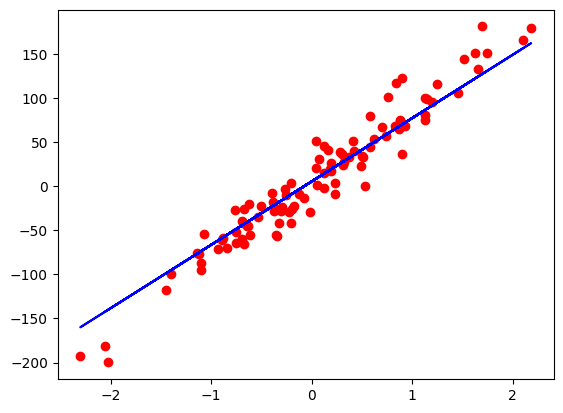

Epoch:  39
Cost: 398.19311523437500000000
Coefficients: 
m: 73.48616790771484375000
m (gradient): -14.27618122100830078125
b: 4.99554204940795898438
b (gradient): 0.79126572608947753906


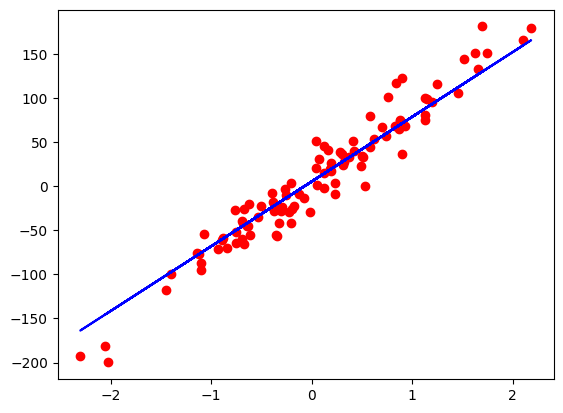

Epoch:  49
Cost: 380.51644897460937500000
Coefficients: 
m: 74.79633331298828125000
m (gradient): -12.19031810760498046875
b: 4.91606855392456054688
b (gradient): 0.79363971948623657227


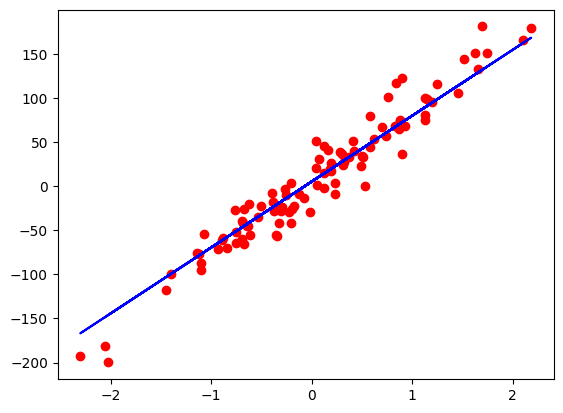

Epoch:  59
Cost: 367.61071777343750000000
Coefficients: 
m: 75.91513824462890625000
m (gradient): -10.41044044494628906250
b: 4.83763170242309570312
b (gradient): 0.77409213781356811523


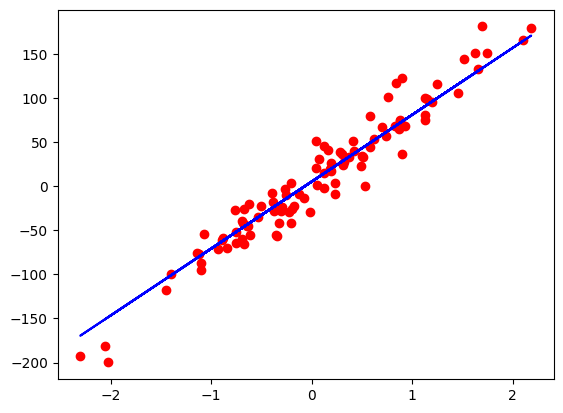

Epoch:  69
Cost: 358.18499755859375000000
Coefficients: 
m: 76.87065124511718750000
m (gradient): -8.89142417907714843750
b: 4.76201248168945312500
b (gradient): 0.73978209495544433594


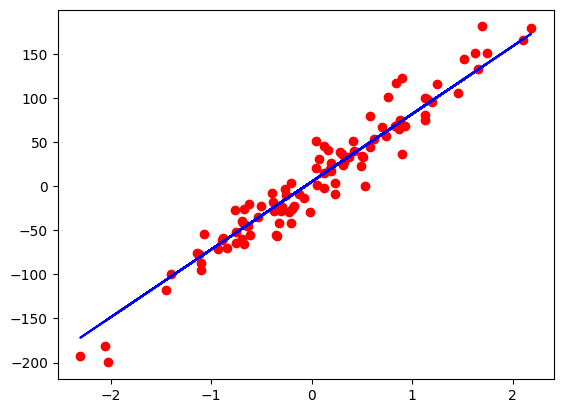

Epoch:  79
Cost: 351.29885864257812500000
Coefficients: 
m: 77.68679046630859375000
m (gradient): -7.59486484527587890625
b: 4.69037818908691406250
b (gradient): 0.69610071182250976562


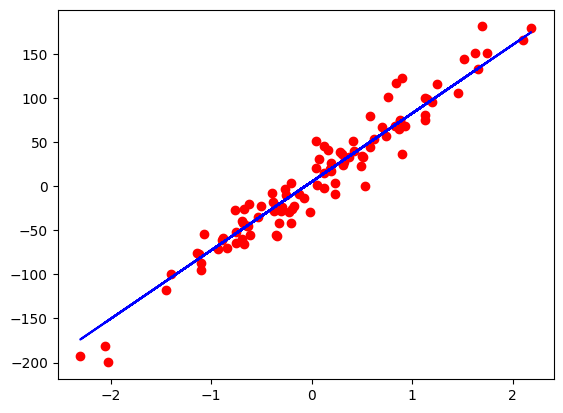

Epoch:  89
Cost: 346.26657104492187500000
Coefficients: 
m: 78.38395690917968750000
m (gradient): -6.48802804946899414062
b: 4.62343549728393554688
b (gradient): 0.64704936742782592773


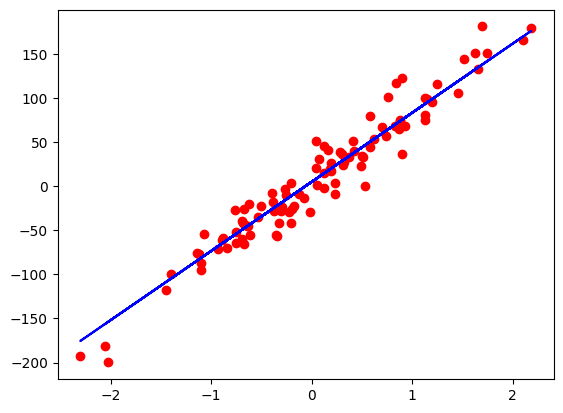

Epoch:  99
Cost: 342.58813476562500000000
Coefficients: 
m: 78.97955322265625000000
m (gradient): -5.54303503036499023438
b: 4.56155157089233398438
b (gradient): 0.59556066989898681641


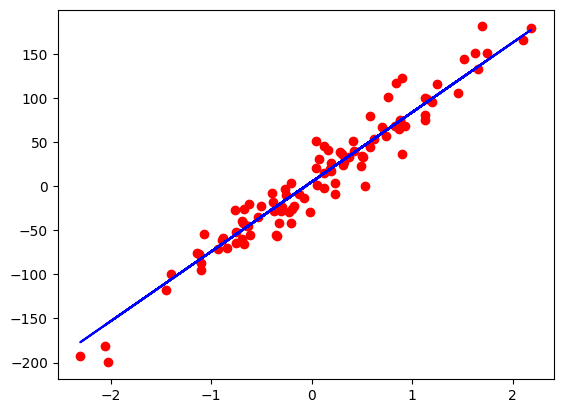

Epoch:  109
Cost: 339.89868164062500000000
Coefficients: 
m: 79.48842620849609375000
m (gradient): -4.73613214492797851562
b: 4.50484895706176757812
b (gradient): 0.54375386238098144531


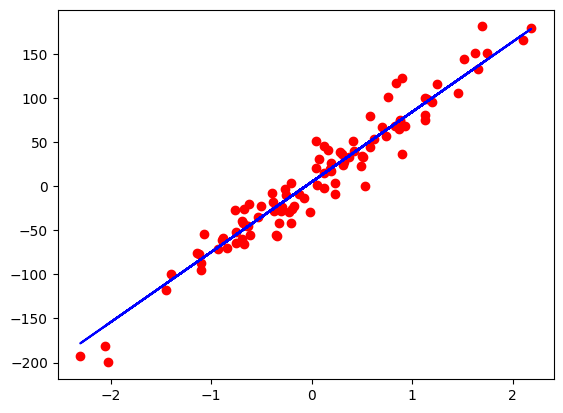

Epoch:  119
Cost: 337.93182373046875000000
Coefficients: 
m: 79.92325592041015625000
m (gradient): -4.04702329635620117188
b: 4.45327281951904296875
b (gradient): 0.49311199784278869629


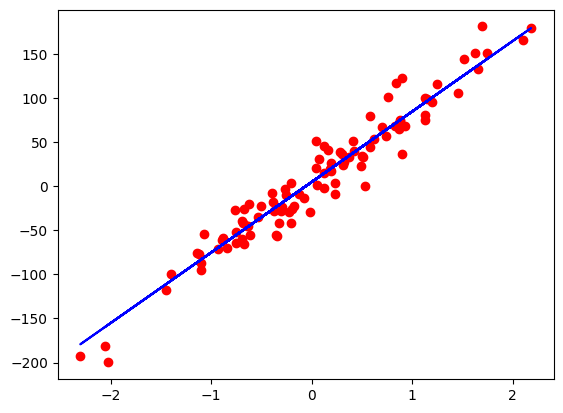

Epoch:  129
Cost: 336.49328613281250000000
Coefficients: 
m: 80.29482269287109375000
m (gradient): -3.45848512649536132812
b: 4.40664863586425781250
b (gradient): 0.44462898373603820801


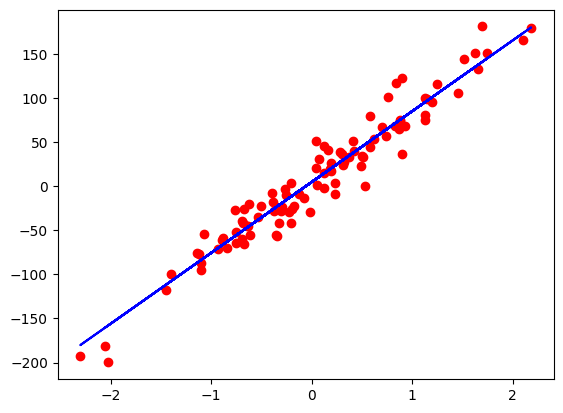

Epoch:  139
Cost: 335.44082641601562500000
Coefficients: 
m: 80.61236572265625000000
m (gradient): -2.95578384399414062500
b: 4.36472320556640625000
b (gradient): 0.39894917607307434082


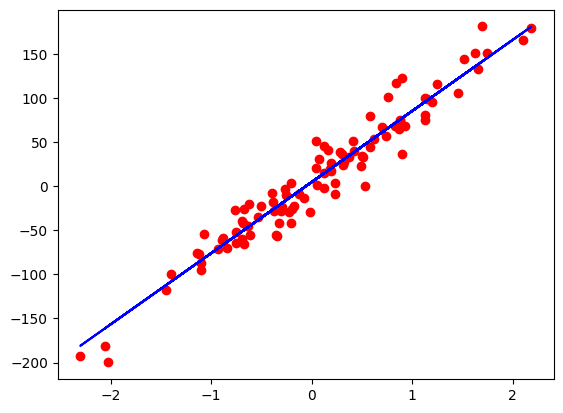

Epoch:  149
Cost: 334.67077636718750000000
Coefficients: 
m: 80.88376617431640625000
m (gradient): -2.52634119987487792969
b: 4.32719373703002929688
b (gradient): 0.35644420981407165527


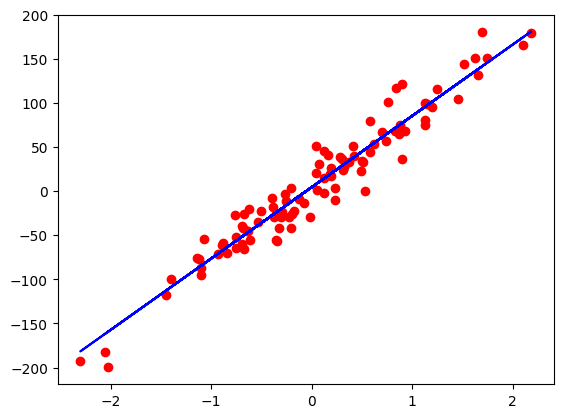

In [6]:
# TRAINING LOOP
num_epochs = 150
cost_counter = []
for epoch in range(num_epochs):
  # Forward pass and loss calculation
  y_hat = model(x)
  loss = criterion(y_hat, y)
  cost_counter.append(loss)

  # Backward pass (calculate gradients)
  loss.backward()

  # Update weights
  optimizer.step()

  if (epoch + 1) % 10 == 0:
    print('Epoch: ', epoch)
    print('Cost: {:.20f}'.format(loss.item()))
    print('Coefficients: ')
    print('m: {:.20f}'.format(model.weight.data.detach().item()))
    print('m (gradient): {:.20f}'.format(model.weight.grad.detach().item()))
    print('b: {:.20f}'.format(model.bias.data.detach().item()))
    print('b (gradient): {:.20f}'.format(model.bias.grad.detach().item()))

    final_prediction = y_hat.detach().numpy()
    plt.plot(x_numpy, y_numpy, 'ro')
    plt.plot(x_numpy, final_prediction, 'b')
    plt.show()

  # Clear the optimizer
  optimizer.zero_grad()